----
#**Image Processing Techniques with OpenCV**

*This tutorial explores fundamental image processing techniques using the OpenCV library, a powerful tool for computer vision and image analysis. The tutorial covers various image manipulation processes, including color space conversion, image blurring, border addition, channel splitting, and more. By examining these techniques, users will gain a strong foundation in essential image processing skills, making them well-equipped to handle tasks such as noise reduction, feature extraction, and data augmentation in the field of computer vision and image analysis.*

----

1. Image Reading (with and without color)
2. Grayscale Conversion
3. Color Space Manipulation (Splitting channels)
4. Image Blending (Weighted Sum)
5. Image Subtraction
6. Image Resizing
7. Erosion
8. Gaussian Blur
9. Median Blur
10. Bilateral Filter
11. Border Adding (Constant and Replicate)
12. Color Conversion (Grayscale and HSV)


In [31]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(1280, 1280, 3)
255


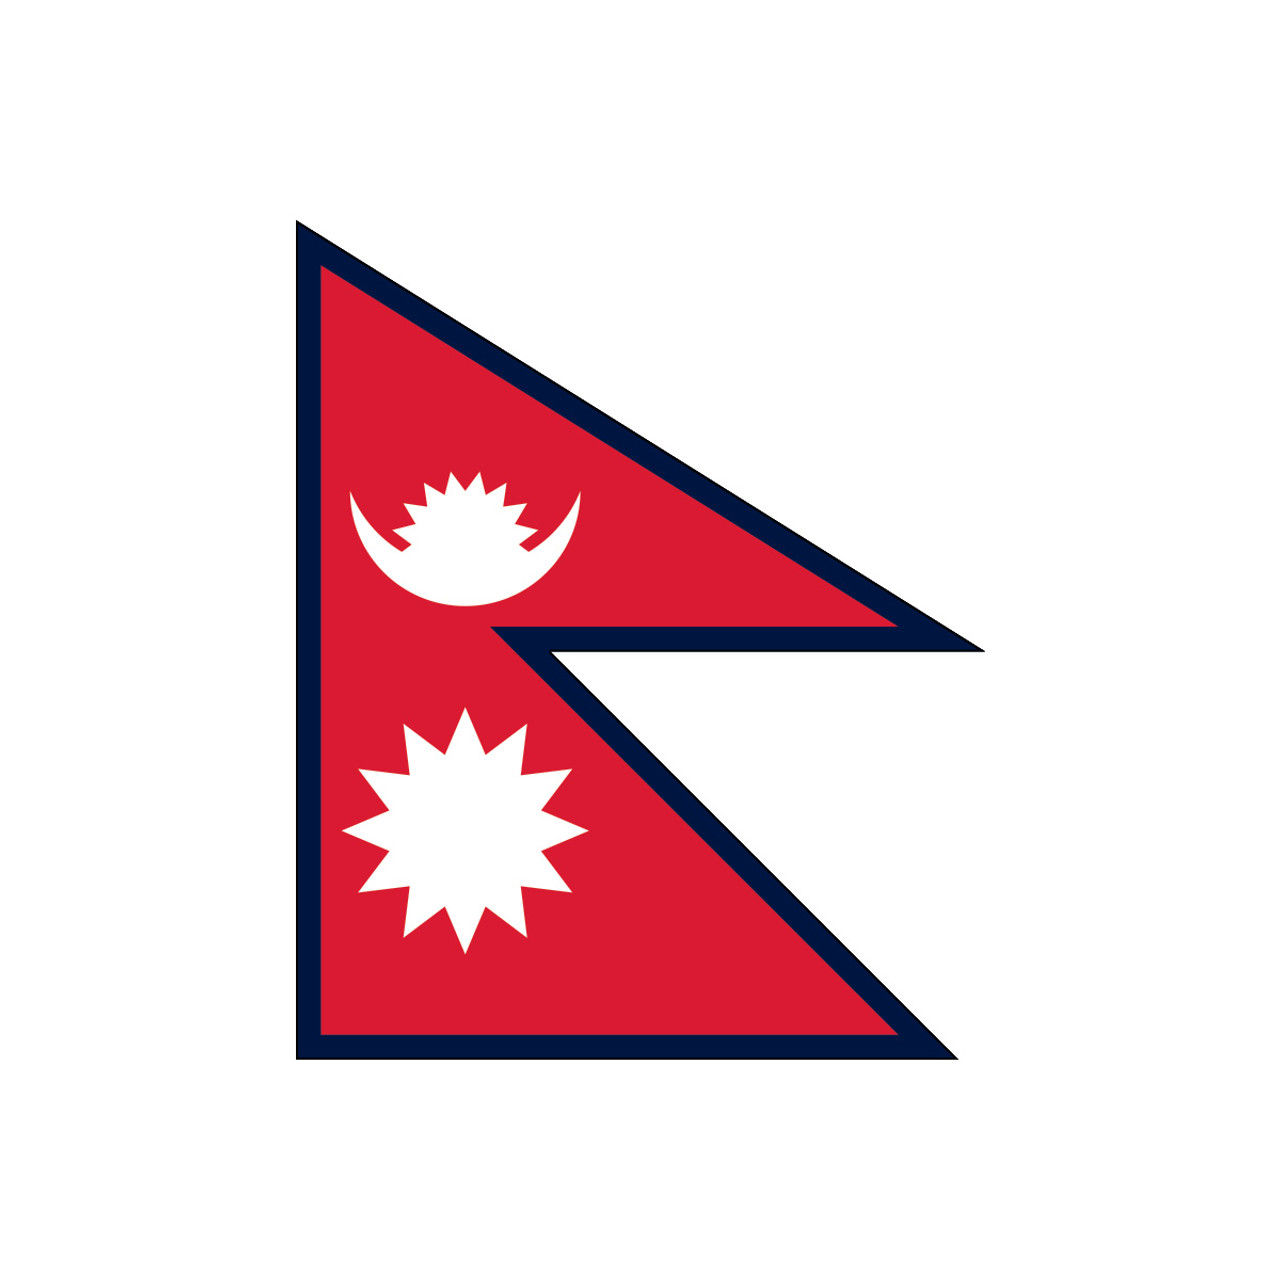

In [32]:
# cv2.imread used for image reading with orignal colour
img = cv2.imread("/content/flagNepal.jpg",1)
# 0 - 255 range for each pixel value
print(img.shape) #(h,w,c)
print(img[0][0][0]) # how 0,0 pixel looks like for 1 channel
#cv2.imshow("image", img)
cv2_imshow(img)

(1280, 1280)


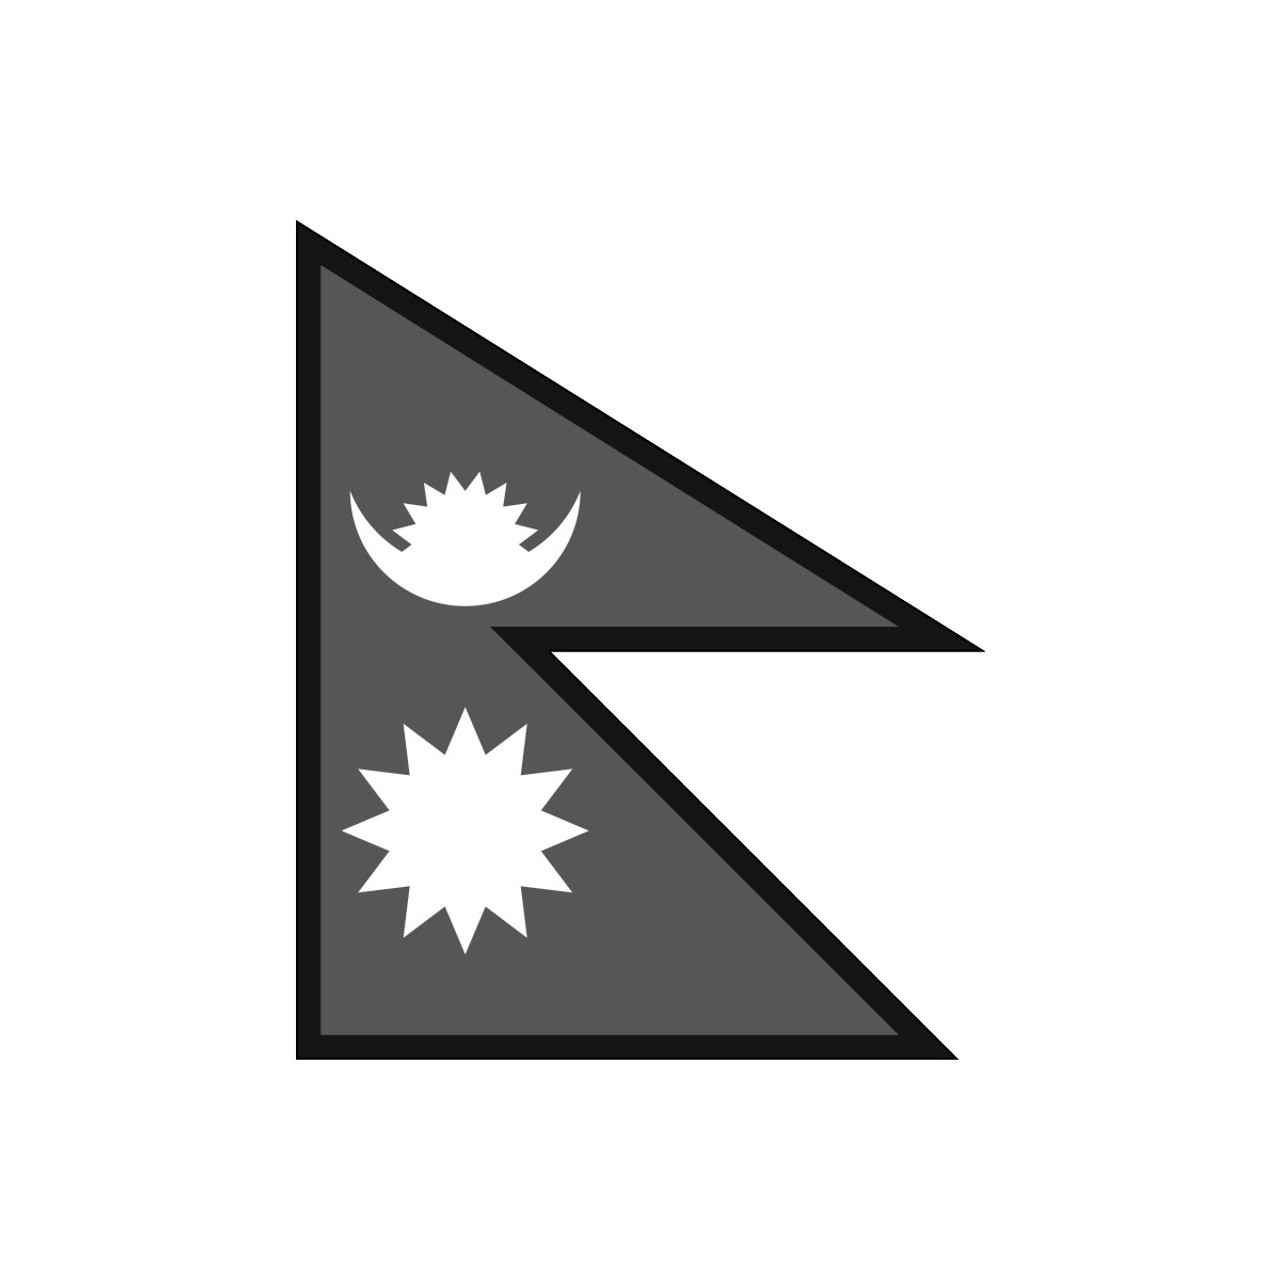

In [33]:
# cv2.imread used for image reading with orignal colour
img = cv2.imread("/content/flagNepal.jpg",0)
print(img.shape)
cv2_imshow(img)
# important to remember gray scale images have only 1 channel

(1280, 1280, 3)


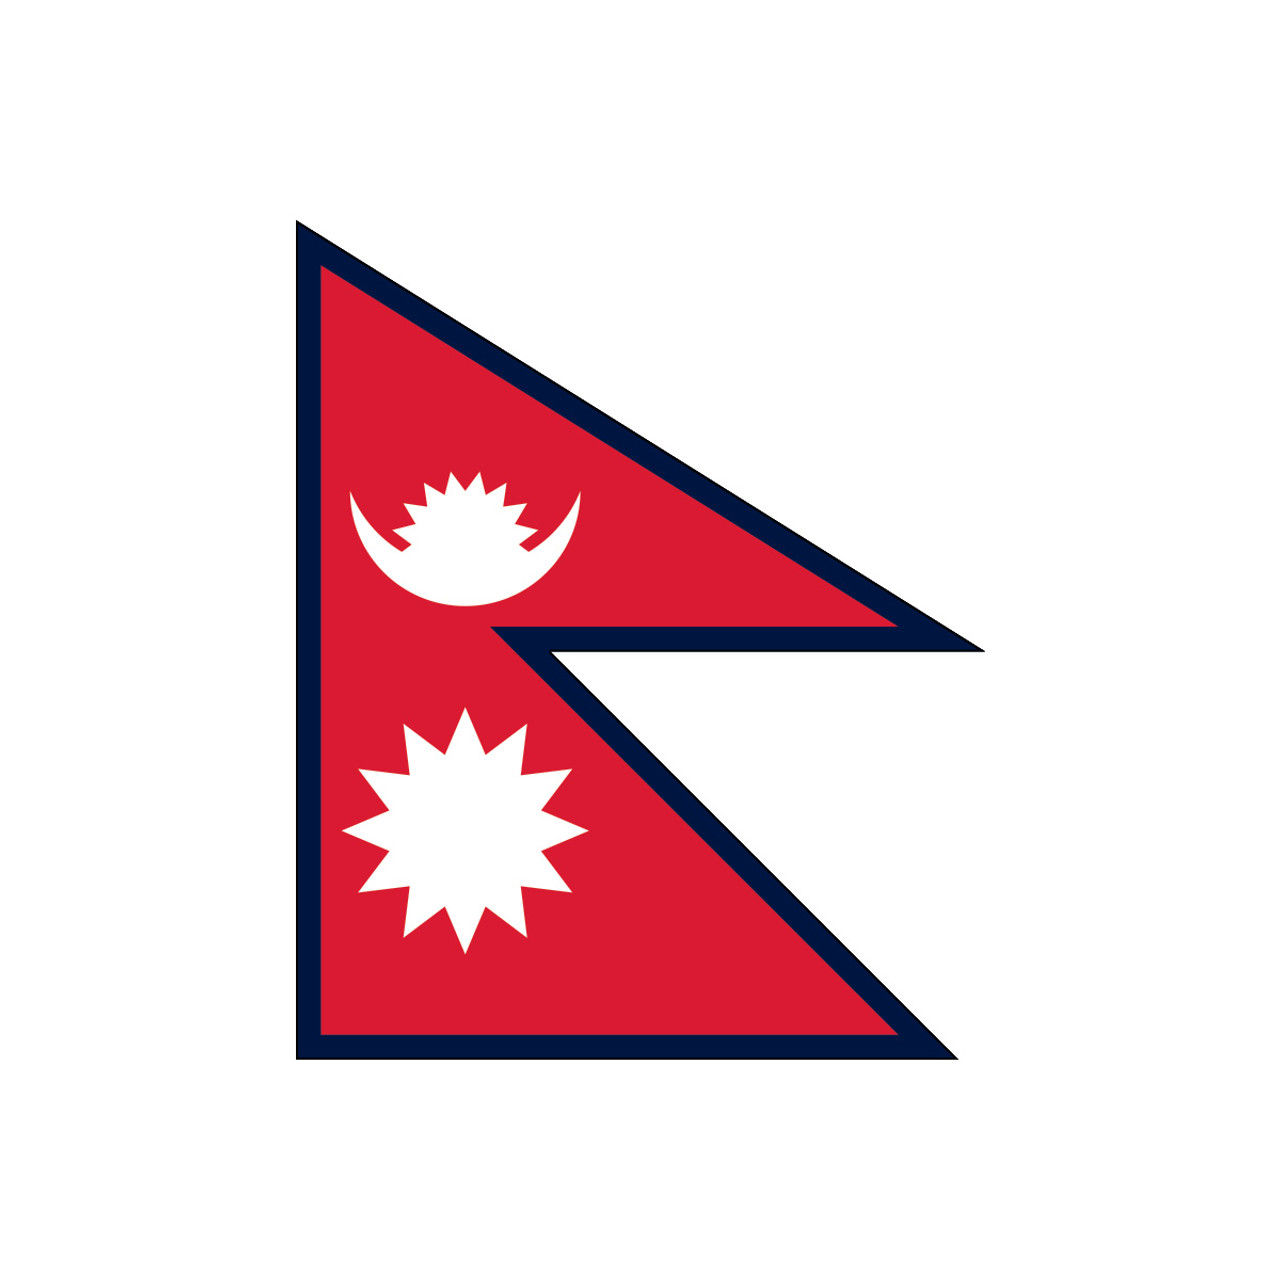

In [34]:
# cv2.imread used for image reading with orignal colour
img = cv2.imread("/content/flagNepal.jpg",-1)
print(img.shape)
cv2_imshow(img)
# important to remember gray scale images have only 1 channel

In [35]:
# saving the image
"""
Syntax: cv2.imwrite(filename, image)

Parameters:
filename: A string representing the file name. The filename must include image format like .jpg, .png, etc.
image: It is the image that is to be saved.
"""
img = cv2.imread("/content/flagNepal.jpg",0)
cv2.imwrite("gray_scaled.png",img)

True

(394, 437, 3)


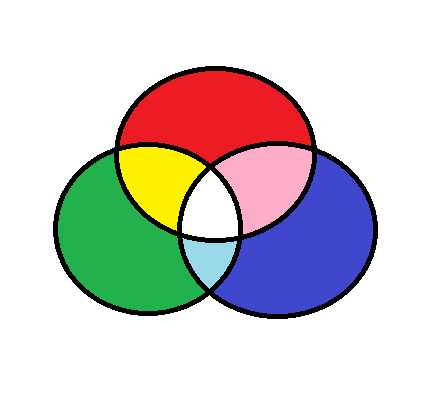

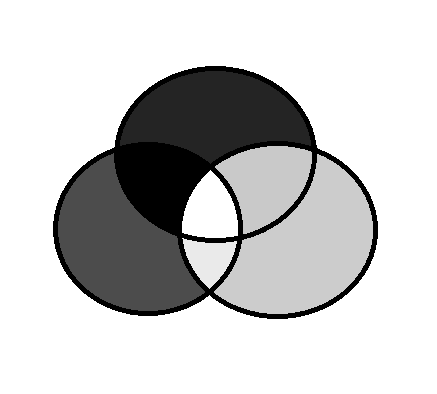

In [36]:
# color space
image = cv2.imread("/content/RGB_paint.png")
print(image.shape)
B, G, R = cv2.split(image) # BGR FORMAT BLUE GREEN RED
cv2_imshow(image)
cv2_imshow(B)

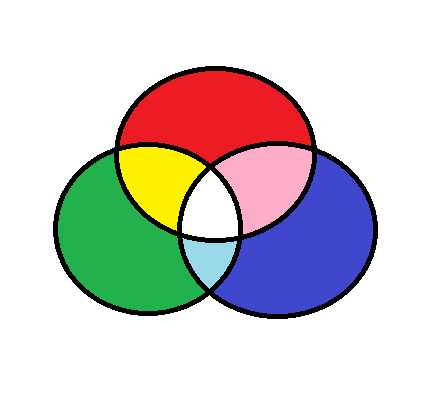

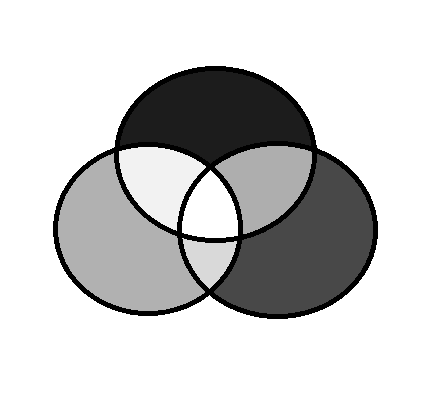

In [37]:
cv2_imshow(image)
cv2_imshow(G)

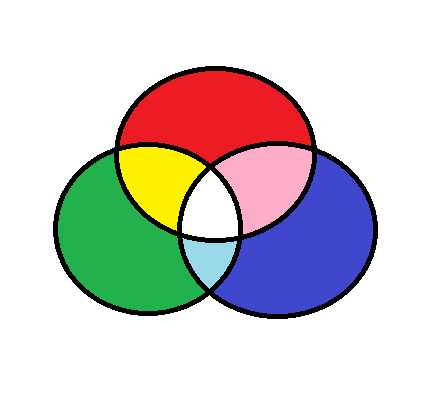

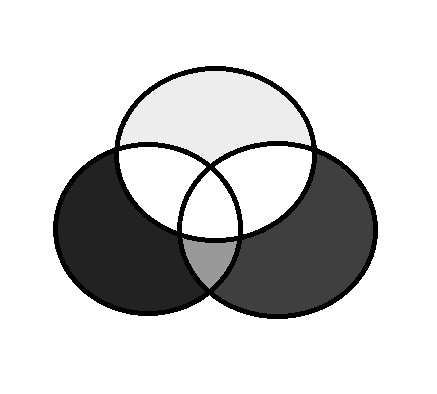

In [38]:
cv2_imshow(image)
cv2_imshow(R)

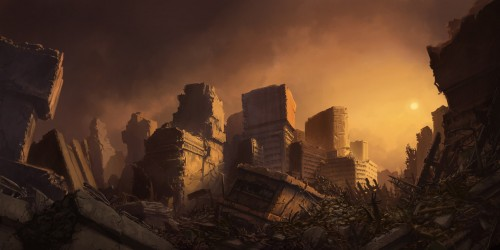

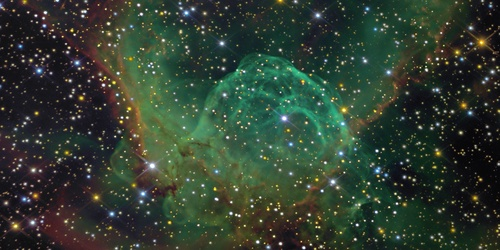

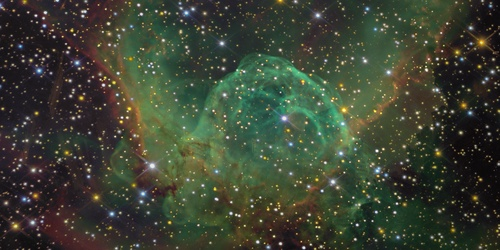

In [39]:
"""
Syntax: cv2.addWeighted(img1, wt1, img2, wt2, gammaValue)
Parameters:
img1: First Input Image array(Single-channel, 8-bit or floating-point)
wt1: Weight of the first input image elements to be applied to the final image
img2: Second Input Image array(Single-channel, 8-bit or floating-point)
wt2: Weight of the second input image elements to be applied to the final image
gammaValue: Measurement of light
"""

image1 = cv2.imread('1-500x250-3.jpg')
image2 = cv2.imread('2-500x250-2.jpg')
weightedSum = cv2.addWeighted(image1, .2, image2,.9,0)
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(weightedSum)

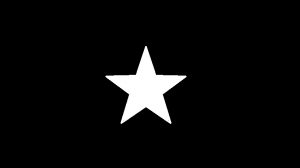

In [40]:
image1 = cv2.imread('star-1-300x168.jpg')
image2 = cv2.imread('dot-300x168.jpg')
subtracted=cv2.subtract(image1,image2)
cv2_imshow(image1)



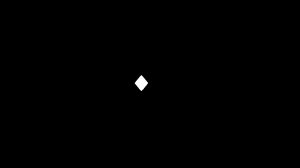

In [41]:
cv2_imshow(image2)

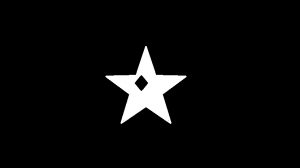

In [42]:
cv2_imshow(subtracted)

(250, 500, 3)


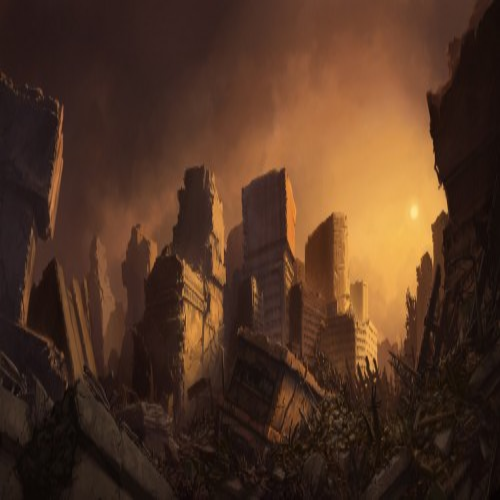

In [43]:
image1 = cv2.imread('1-500x250-3.jpg')
print(image1.shape)
# cv2_imshow(image1)
#(H,W,C) 1 : 1
cv2_imshow(cv2.resize(image1,(500,500))) # width, height

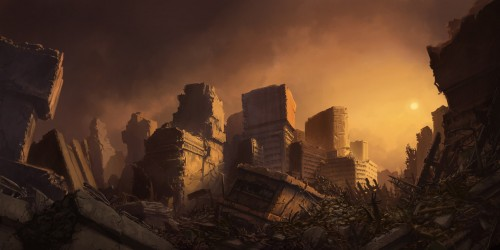

In [44]:
image1 = cv2.imread('1-500x250-3.jpg')
cv2_imshow(image1)

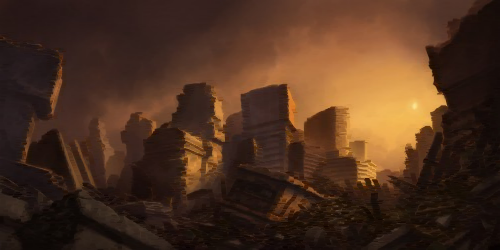

In [45]:
""" produce noise in the orignal data
It is normally performed on binary images. It needs two inputs,
one is our original image, second one is called structuring element or
kernel which decides the nature of operation. A pixel in the original image (either 1 or 0) will be
considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero)."""

import numpy as np
kernel = np.ones((1, 4), np.uint8)
image_erode = cv2.erode(image1, kernel)
cv2_imshow(image_erode)

----
#***Continued***

----

In [46]:
# Blurring

image_orig = cv2.imread('/content/fruits.jpg')

In [47]:
# Resizing Image
image_orig = cv2.resize(image_orig, (600,600))

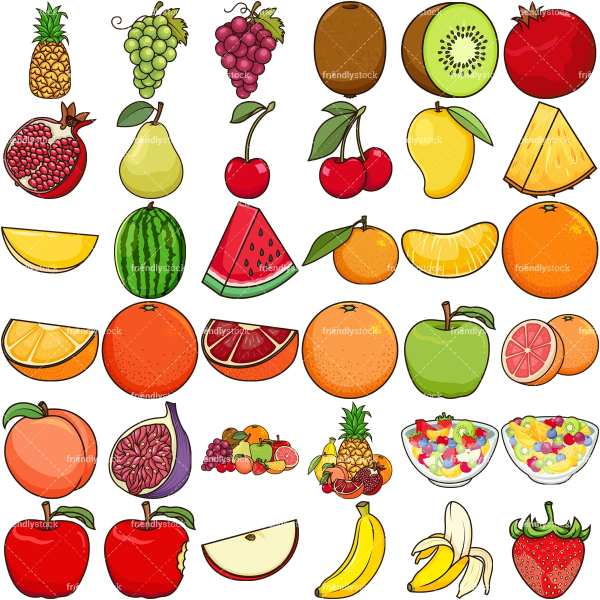

In [48]:
cv2_imshow(image_orig)

In [49]:
image_orig.shape

(600, 600, 3)

---
**Three Types of Blurs:**
   1. Gaussian Blur
   2. Median Blue
   3. Bilateral Filter

In [50]:
'cv::GaussianBlur (InputArray src, OutputArray dst, Size ksize, double sigmaX, double sigmaY=0, int borderType=BORDER_DEFAULT)'

'cv::GaussianBlur (InputArray src, OutputArray dst, Size ksize, double sigmaX, double sigmaY=0, int borderType=BORDER_DEFAULT)'

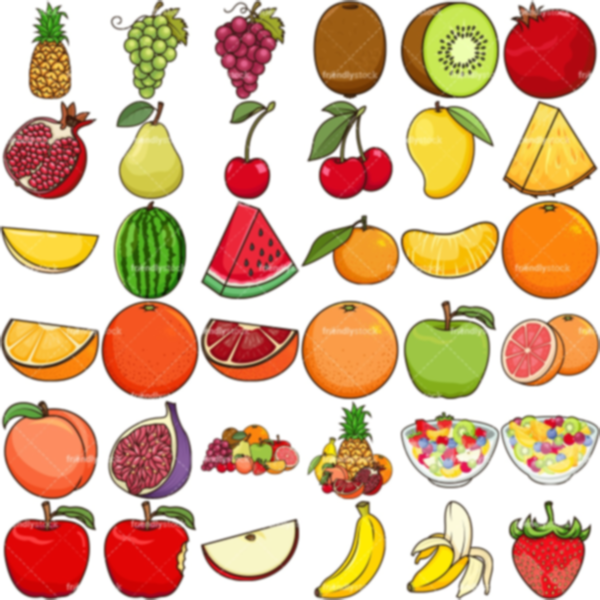

In [51]:
# GaussianBlur
Gaussian = cv2.GaussianBlur(image_orig, (5,5), 0)
cv2_imshow(Gaussian)

In [52]:
# the kernel size cannot be even for Gaussian Blur
'''
error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:293:
error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1
in function 'createGaussianKernels'
'''

"\nerror: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:293:\nerror: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1\nin function 'createGaussianKernels'\n"

----
**Median Blur**

In [53]:
'cv::medianBlur (InputArray src, OutputArray dst, int ksize)'

'cv::medianBlur (InputArray src, OutputArray dst, int ksize)'

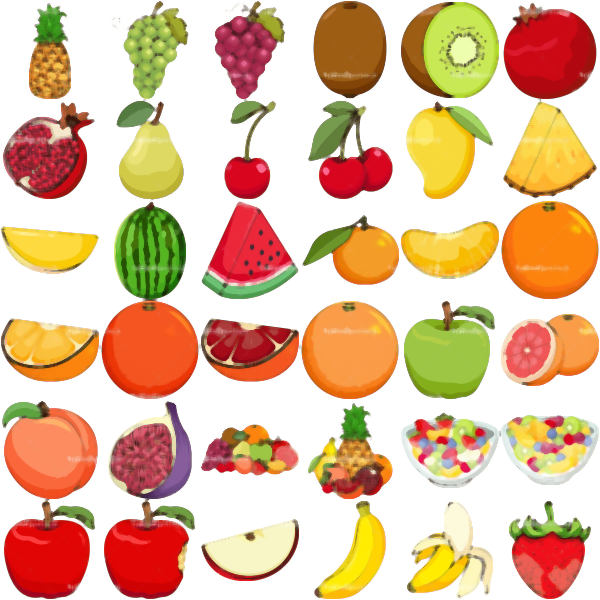

In [54]:
median = cv2.medianBlur(image_orig, 5)
cv2_imshow(median)

----

**Bilateral Filter**

In [55]:
'cv::bilateralFilter (InputArray src, OutputArray dst, int d, double sigmaColor, double sigmaSpace, int borderType=BORDER_DEFAULT)'

'cv::bilateralFilter (InputArray src, OutputArray dst, int d, double sigmaColor, double sigmaSpace, int borderType=BORDER_DEFAULT)'

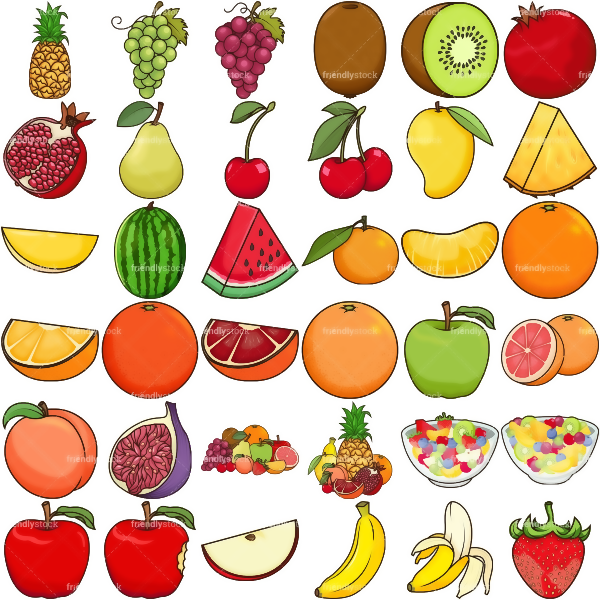

In [56]:
bilateral = cv2.bilateralFilter(image_orig, 9,75,75)
cv2_imshow(bilateral)

----
**Differences:**

1. Gaussian Blur: Smooths images by taking a weighted average of neighboring pixel values. It's effective for general noise reduction and creates a soft, continuous blurring effect. Commonly used for image smoothing and maintaining a natural appearance.

2. Median Blur: Replaces each pixel's value with the median value from a neighborhood. It's particularly effective for removing impulsive noise like salt-and-pepper noise while preserving edges and fine details. It's commonly used in situations where noise reduction is the primary concern.

3. Bilateral Filter: The bilateral filter is a more advanced technique that considers both spatial closeness and color similarity when filtering. It preserves edges while smoothing regions of similar color. It's effective for noise reduction and edge preservation. It's often used when fine detail preservation and noise reduction are both essential.

----

----
#**Make Borders**
----

In [57]:
image_orig = cv2.imread('/content/fruits.jpg')
image_orig = cv2.resize(image_orig, (500,500))

```
Syntax: cv2.copyMakeBorder(src, top, bottom, left, right, borderType, value)

Parameters:
src: It is the source image.
top: It is the border width in number of pixels in top direction.
bottom: It is the border width in number of pixels in bottom direction.
left: It is the border width in number of pixels in left direction.
right: It is the border width in number of pixels in right direction.
borderType: It depicts what kind of border to be added. It is defined by flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc dest:
            It is the destination image
value: It is an optional parameter which depicts color of border if border type is cv2.BORDER_CONSTANT.
```

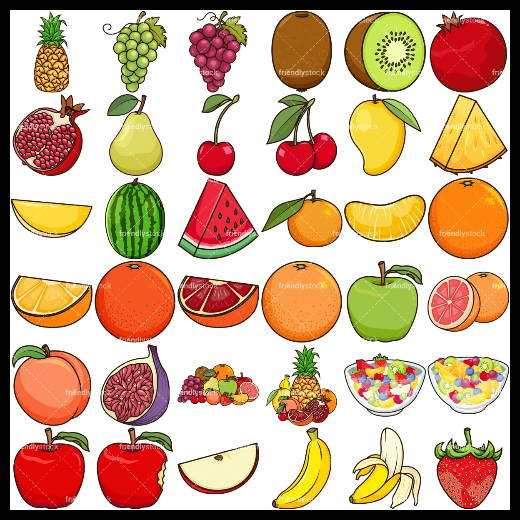

In [58]:
image = cv2.copyMakeBorder(image_orig, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
cv2_imshow(image)

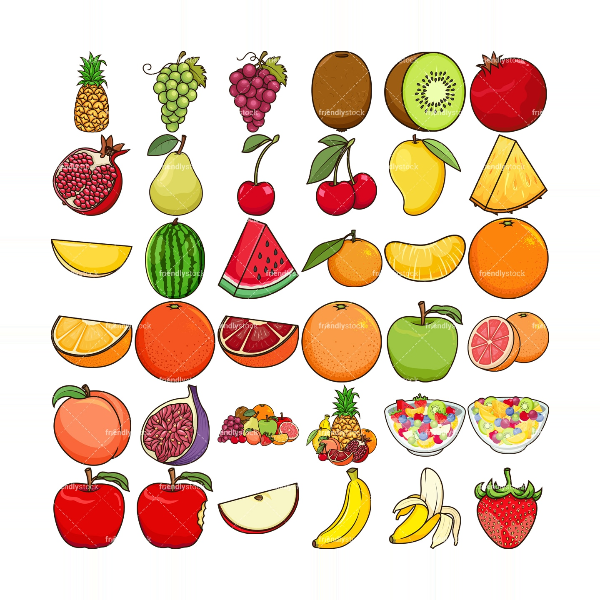

In [59]:
image = cv2.copyMakeBorder(image_orig,50, 50, 50, 50, cv2.BORDER_REPLICATE)
cv2_imshow(image)

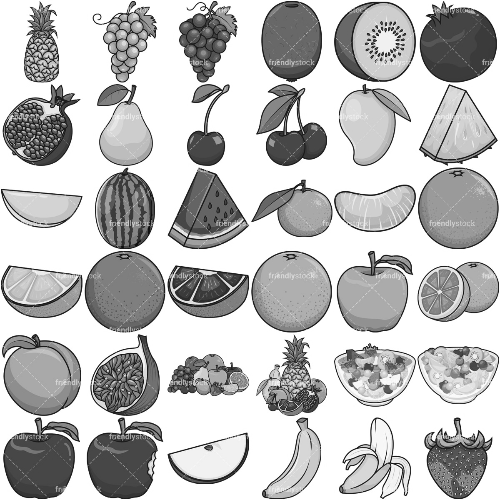

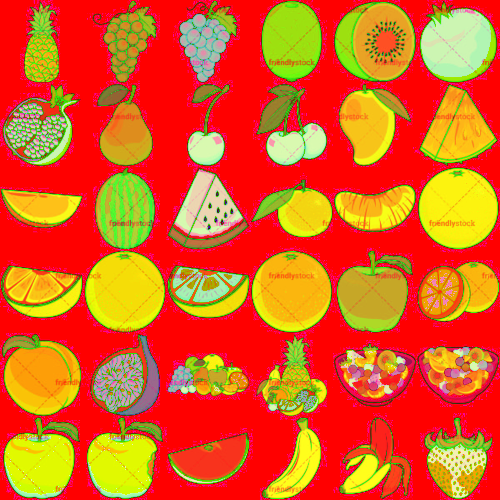

In [60]:
src = cv2.imread('/content/fruits.jpg')
image_orig=cv2.resize(src,(500,500))
image_gray = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)
image_hsv = cv2.cvtColor(image_orig, cv2.COLOR_BGR2HSV)

cv2_imshow(image_gray)
print()
cv2_imshow(image_hsv)

#Summary

**1. Image Reading (with and without color):**
```python
# Reading an image in color (1 for color)
img_color = cv2.imread("image.jpg", 1)

# Reading an image in grayscale (0 for grayscale)
img_grayscale = cv2.imread("image.jpg", 0)
```

**2. Grayscale Conversion:**
```python
# Convert a color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
```

**3. Color Space Manipulation (Splitting channels):**
```python
# Splitting color channels
B, G, R = cv2.split(color_image)
```

**4. Image Blending (Weighted Sum):**
```python
# Blending two images with weights
blended_image = cv2.addWeighted(image1, weight1, image2, weight2, gamma)
```

**5. Image Subtraction:**
```python
# Subtracting two images
subtracted_image = cv2.subtract(image1, image2)
```

**6. Image Resizing:**
```python
# Resize an image to a specified width and height
resized_image = cv2.resize(image, (width, height))
```

**7. Erosion:**
```python
# Erode an image using a kernel
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(image, kernel)
```

**8. Gaussian Blur:**
```python
# Apply Gaussian blur to an image
blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
```

**9. Median Blur:**
```python
# Apply Median blur to an image
blurred_image = cv2.medianBlur(image, kernel_size)
```

**10. Bilateral Filter:**
```python
# Apply Bilateral filter to an image
filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
```

**11. Border Adding (Constant and Replicate):**
```python
# Add borders with a constant value
border_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, None, value)

# Add borders by replicating the edge pixels
border_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REPLICATE)
```

**12. Color Conversion (Grayscale and HSV):**
```python
# Convert a color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Convert a color image to HSV (Hue, Saturation, Value)
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
```